In [1]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.8 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 683.6 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


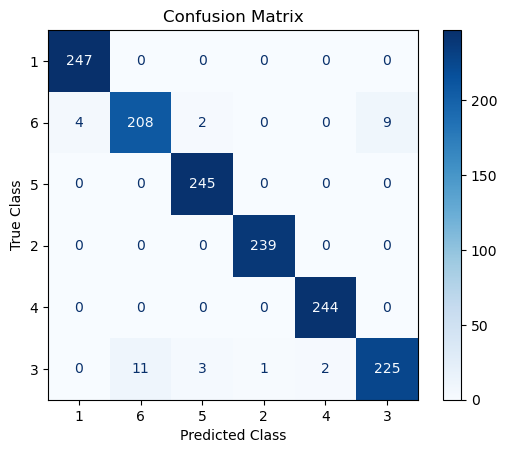

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Modified_tab_data.csv')

# Extract unique classes from the target variable
unique_classes = df['clusterid - Prediction/OutPut'].unique()

# Split the dataset into features (X) and target variable (y)
X = df.drop('clusterid - Prediction/OutPut', axis=1)
y = df['clusterid - Prediction/OutPut']

# Identify categorical features. Assuming 'companycode' is the only categorical feature.
categorical_features_indices = [X.columns.get_loc('companycode')]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost classifier with verbosity turned off and specifying cat_features
catboost_clf = CatBoostClassifier(verbose=0, cat_features=categorical_features_indices)
catboost_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = catboost_clf.predict(X_test)

# Generate confusion matrix with labels
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_classes)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_classes)

# Use the plot function of ConfusionMatrixDisplay
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

CatBoost Classifier Accuracy: 0.9770833333333333
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       247
           2       1.00      1.00      1.00       239
           3       0.96      0.93      0.95       242
           4       0.99      1.00      1.00       244
           5       0.98      1.00      0.99       245
           6       0.95      0.93      0.94       223

    accuracy                           0.98      1440
   macro avg       0.98      0.98      0.98      1440
weighted avg       0.98      0.98      0.98      1440



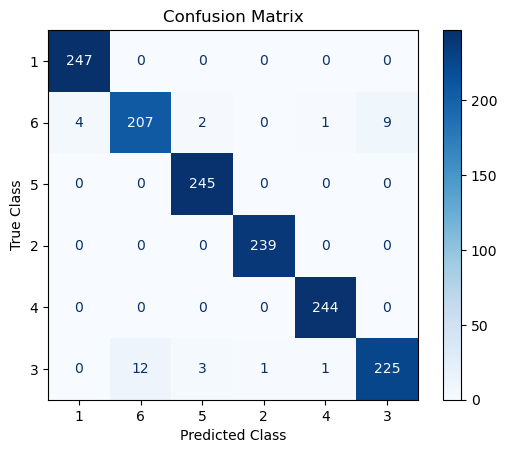

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Modified_tab_data.csv')

# Features and target variable
X = df.drop('clusterid - Prediction/OutPut', axis=1)  # Drop the target variable to isolate features
y = df['clusterid - Prediction/OutPut']  # Target variable

# Identify categorical features (assuming all non-numeric columns are categorical)
categorical_features_indices = [i for i, col in enumerate(X.columns) if X[col].dtype == 'object']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier with a custom logging directory
catboost_clf = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='MultiClass',
    cat_features=categorical_features_indices,
    verbose=False,
    train_dir='catboost_info_type_Modified_tab_data'  # Custom directory for the new dataset
)


# Train CatBoostClassifier
catboost_clf.fit(X_train, y_train)

# Make predictions
predictions = catboost_clf.predict(X_test)

# Make predictions on the test set
y_pred = catboost_clf.predict(X_test)

# Evaluate the model
print("CatBoost Classifier Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

# Generate confusion matrix with labels
conf_matrix = confusion_matrix(y_test, y_pred, labels=unique_classes)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_classes)

# Use the plot function of ConfusionMatrixDisplay
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [2]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.8 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


Accuracy: 0.94
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       247
           1       0.98      1.00      0.99       239
           2       0.84      0.82      0.83       242
           3       0.99      1.00      1.00       244
           4       0.97      1.00      0.99       245
           5       0.84      0.80      0.82       223

    accuracy                           0.94      1440
   macro avg       0.94      0.94      0.94      1440
weighted avg       0.94      0.94      0.94      1440



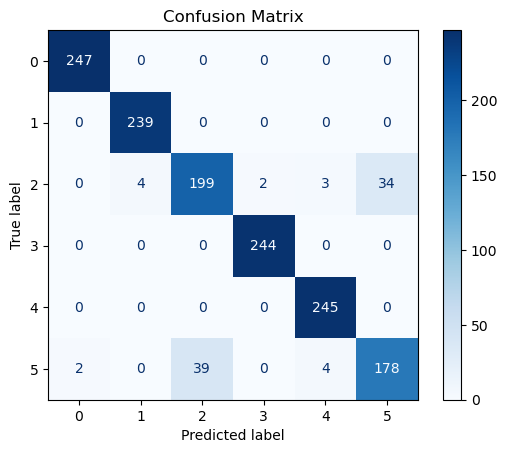

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('Modified_tab_data.csv')

# Exclude the non-numeric 'companycode' column
df = df.drop(columns=['companycode'])

# Separate features and target variable
X = df.drop('clusterid - Prediction/OutPut', axis=1)
y = df['clusterid - Prediction/OutPut']

# Encode the target variable as integer labels
y = y.astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier for multi-class classification
xgb_model = XGBClassifier(objective='multi:softmax', num_class=len(y.unique()), use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9347222222222222
Classification Report:
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       247
           2       1.00      1.00      1.00       239
           3       0.82      0.81      0.82       242
           4       0.98      1.00      0.99       244
           5       0.97      1.00      0.98       245
           6       0.83      0.78      0.80       223

    accuracy                           0.93      1440
   macro avg       0.93      0.93      0.93      1440
weighted avg       0.93      0.93      0.93      1440



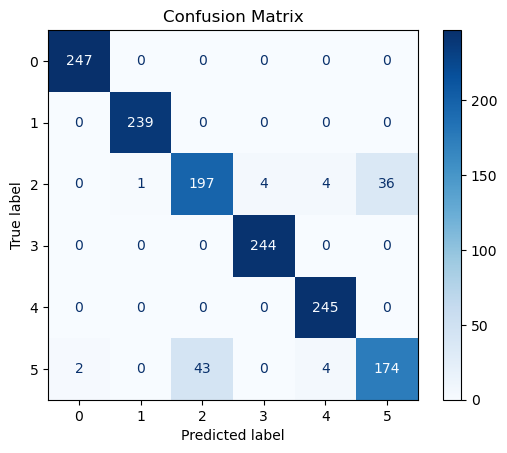

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('Modified_tab_data.csv')

# Exclude the non-numeric 'companycode' column
df = df.drop(columns=['companycode'])

# Separate features and target variable
X = df.drop('clusterid - Prediction/OutPut', axis=1)
y = df['clusterid - Prediction/OutPut']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier for multi-class classification
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate metrics and display them
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()